In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns

##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
CLASSES = [0, 1, 2, 3]


###################################
####     SKIT-LEARN DEPS       ####
###################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [2]:
import sys
sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

### Plot acc for ml and dl methods vs diff L (16 features)

In [3]:
ml_knn_acc = np.array([0.500031, 0.511925, 0.573675, 0.575535, 0.643036]) * 100
ml_logreg_acc = np.array([0.500594, 0.333068, 0.381361, 0.354464, 0.350697]) * 100
ml_svm_acc = np.array([0.503798, 0.687281, 0.723040, 0.744936, 0.799059]) * 100
ml_gnb_acc = np.array([0.498922, 0.320971, 0.368686, 0.357386, 0.314000]) * 100
ml_dt_acc = np.array([0.502751, 0.484434, 0.526163, 0.556577, 0.581614]) * 100
ml_rf_acc = np.array([0.501516, 0.443955, 0.543995, 0.549778, 0.570768]) * 100
dl_mlp_acc = np.array([0.5089, 0.6601, 0.7046, 0.7333, 0.8132]) * 100
dl_mlp_cnn_acc = np.array([0.50738, 0.66726, 0.70094, 0.73392, 0.78440]) * 100


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


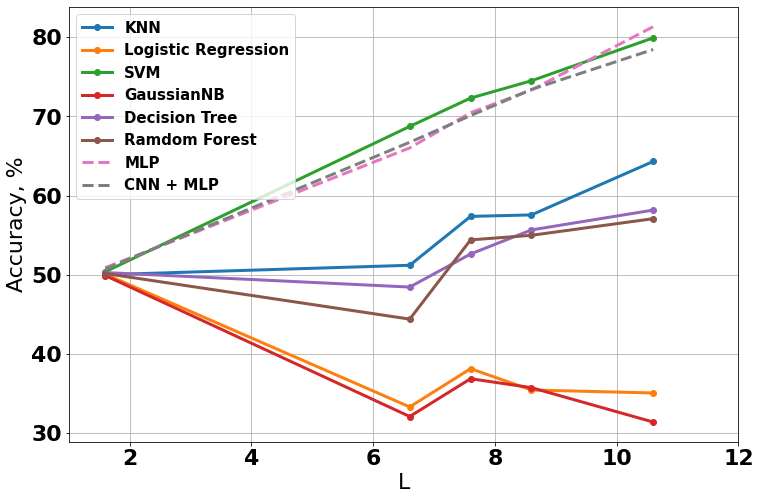

In [4]:
from matplotlib.lines import Line2D

fs = 16
LW = 3
LS1 = '-o'
LS2 = '--'
x = [1.6, 6.6, 7.6, 8.6, 10.6]
xx = range(len(x))

plt.plot(x, ml_knn_acc, LS1, linewidth=LW, label='KNN')
plt.plot(x, ml_logreg_acc, LS1, linewidth=LW, label='Logistic Regression')
plt.plot(x, ml_svm_acc, LS1, linewidth=LW, label='SVM')
plt.plot(x, ml_gnb_acc, LS1, linewidth=LW, label='GaussianNB')
plt.plot(x, ml_dt_acc, LS1, linewidth=LW, label='Decision Tree')
plt.plot(x, ml_rf_acc, LS1, linewidth=LW, label='Ramdom Forest')
plt.plot(x, dl_mlp_acc, LS2, linewidth=LW, label='MLP')
plt.plot(x, dl_mlp_cnn_acc, LS2, linewidth=LW, label='CNN + MLP')
plt.xlabel('L')
plt.ylabel('Accuracy, %')
plt.legend(loc=0, prop={'size': 15})
plt.grid()
# plt.xticks(ticks=x, labels=x)
plt.xlim(1, 12)
pass

### Plot accuracy graph for MLP

In [5]:
x = range(16, 21)

In [6]:
acc_1_6 = [50.75408298820036, 50.800968977104006, 50.683754004844886, 50.8556692974916,  54.56747675236384]
acc_6_6 = [66.01547237633821, 69.5319215441119, 74.69719465499726, 78.24490114870673, 80.04219739001329]
acc_7_6 = [70.46182699070094, 75.18949753848558, 80.50324294756584, 83.33984527623662, 85.47315777135266]
acc_8_6 = [73.33750097679143, 78.04954286160819, 84.25412205985778, 88.05970149253731, 88.98179260764242]
acc_10_6 = [81.32374775337969, 85.73103071032273, 91.49019301398765, 94.23302336485114, 95.31140110963507]

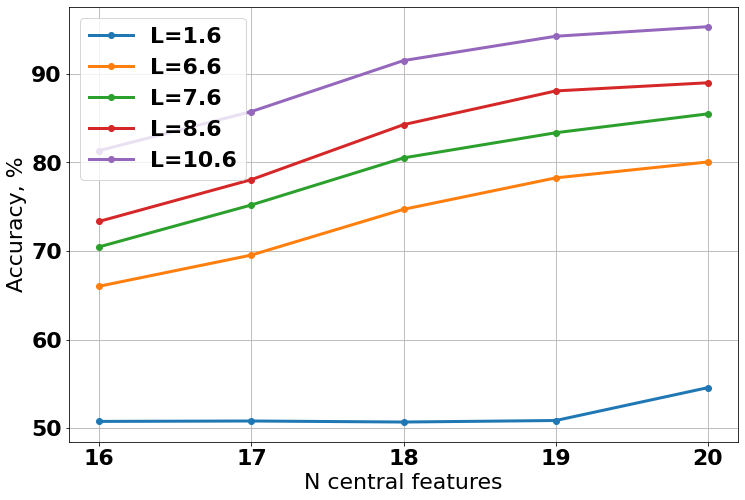

In [7]:
LW = 3
LS = '-o'
plt.plot(x, acc_1_6, LS, label='L=1.6', linewidth=LW)
plt.plot(x, acc_6_6, LS, label='L=6.6', linewidth=LW)
plt.plot(x, acc_7_6, LS, label='L=7.6', linewidth=LW)
plt.plot(x, acc_8_6, LS, label='L=8.6', linewidth=LW)
plt.plot(x, acc_10_6, LS, label='L=10.6', linewidth=LW)
plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend()
plt.grid()
plt.xticks(x)
pass

### Plot accuracy graph for SVM

In [8]:
acc_1_6_svm = np.array([0.494647, 0.493162, 0.498398, 0.514730, 0.553645]) * 100
acc_6_6_svm = np.array([0.691099, 0.725404, 0.768774, 0.801047, 0.821130]) * 100
acc_7_6_svm = np.array([0.723373, 0.764867, 0.821052, 0.847699, 0.864265]) * 100
acc_8_6_svm = np.array([0.735094, 0.783074, 0.849340, 0.880519, 0.891146]) * 100
acc_10_6_svm = np.array([0.799719, 0.850121, 0.904665, 0.935063, 0.946784]) * 100

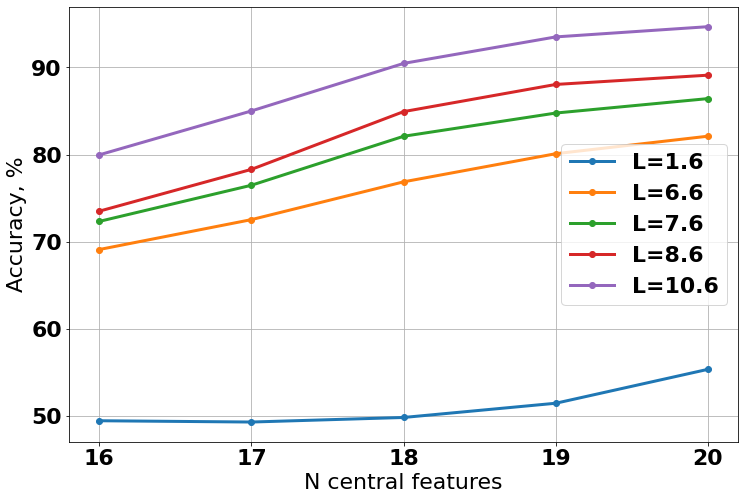

In [9]:
LW = 3
LS = '-o'
plt.plot(x, acc_1_6_svm, LS, label='L=1.6', linewidth=LW)
plt.plot(x, acc_6_6_svm, LS, label='L=6.6', linewidth=LW)
plt.plot(x, acc_7_6_svm, LS, label='L=7.6', linewidth=LW)
plt.plot(x, acc_8_6_svm, LS, label='L=8.6', linewidth=LW)
plt.plot(x, acc_10_6_svm, LS, label='L=10.6', linewidth=LW)
plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend()
plt.grid()
plt.xticks(x)
pass

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


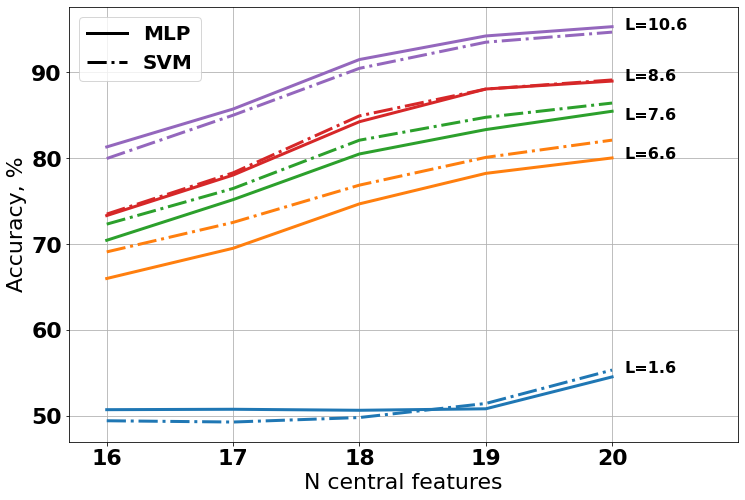

In [10]:
from matplotlib.lines import Line2D

fs = 16
LW = 3
LS1 = '-'
LS2 = '-.'


lines = [Line2D([0], [0], color='black', linewidth=3, linestyle=LS1),
         Line2D([0], [0], color='black', linewidth=3, linestyle=LS2)]
labels = ['MLP', 'SVM']

plt.plot(x, acc_1_6, LS1, color='tab:blue', linewidth=LW)
plt.plot(x, acc_1_6_svm, LS2, color='tab:blue', linewidth=LW)
plt.plot(x, acc_6_6, LS1, color='tab:orange', linewidth=LW)
plt.plot(x, acc_6_6_svm, LS2, color='tab:orange', linewidth=LW)
plt.plot(x, acc_7_6, LS1, color='tab:green', linewidth=LW)
plt.plot(x, acc_7_6_svm, LS2, color='tab:green', linewidth=LW)
plt.plot(x, acc_8_6, LS1, color='tab:red', linewidth=LW)
plt.plot(x, acc_8_6_svm, LS2, color='tab:red', linewidth=LW)
plt.plot(x, acc_10_6, LS1, color='tab:purple', linewidth=LW)
plt.plot(x, acc_10_6_svm, LS2, color='tab:purple', linewidth=LW)
plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend(lines, labels, loc=0, prop={'size': 20})
plt.grid()
plt.xticks(x)
plt.xlim(15.7, 21)
plt.text(20.1, 55, 'L=1.6', fontsize=fs)
plt.text(20.1, 80, 'L=6.6', fontsize=fs)
plt.text(20.1, 84.5, 'L=7.6', fontsize=fs)
plt.text(20.1, 89, 'L=8.6', fontsize=fs)
plt.text(20.1, 95, 'L=10.6', fontsize=fs)
pass

### Plot acc vs N

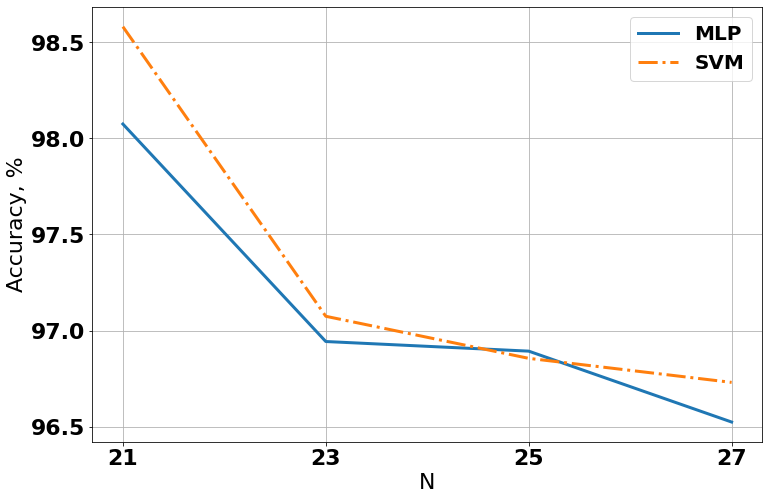

In [11]:
fs = 16
LW = 3
LS1 = '-'
LS2 = '-.'

x = [21, 23, 25, 27]
mlp_acc_n = np.array([98.07451862965742, 96.9429857464366, 96.89297324331083, 96.52413103275819])
svm_acc_n = np.array([0.985809, 0.970743, 0.968555, 0.967304])*100

plt.plot(x, mlp_acc_n, LS1, linewidth=LW, label='MLP')
plt.plot(x, svm_acc_n, LS2, linewidth=LW, label='SVM')
plt.xlabel('N')
plt.ylabel('Accuracy, %')
plt.legend(loc=1, prop={'size': 20})
plt.xticks(x)
plt.grid()

In [12]:
mlp_acc_N21 = np.array([98.07451862965742, 98.49337334333583, 98.79344836209053, 98.88097024256064, 99.32483120780195])
mlp_acc_N23 = np.array([96.9429857464366, 97.30557639409852, 97.81195298824706, 98.21830457614404, 98.6496624156039])
mlp_acc_N25 = np.array([96.89297324331083, 97.33683420855213, 97.71817954488623, 98.0995248812203, 98.26831707926982])
mlp_acc_N27 = np.array([96.52413103275819, 96.81170292573144, 97.52438109527382, 97.95573893473369, 98.03700925231308])

svm_acc_N21 = np.array([0.985809, 0.992498, 0.994499, 0.995811, 0.996187]) * 100
svm_acc_N23 = np.array([0.970743, 0.978745, 0.981745, 0.989935, 0.991748]) * 100
svm_acc_N25 = np.array([0.968555, 0.980308, 0.985809, 0.989247, 0.990310]) * 100
svm_acc_N27 = np.array([0.967304, 0.977057, 0.984059, 0.987184, 0.988060]) * 100

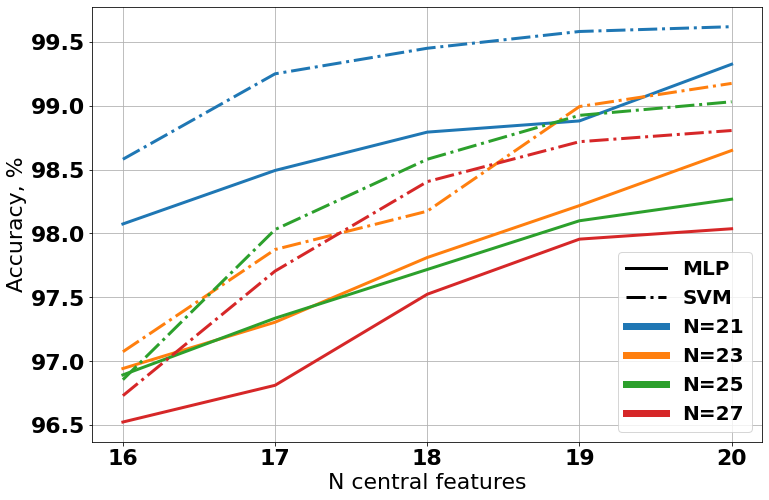

In [13]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

fs = 16
LW = 3
LW2 = 7
LS1 = '-'
LS2 = '-.'

x = [16, 17, 18, 19, 20]
lines = [Line2D([0], [0], color='black', linewidth=LW, linestyle=LS1),
         Line2D([0], [0], color='black', linewidth=LW, linestyle=LS2), 
         Line2D([0], [0], color='tab:blue', linewidth=LW2, linestyle='-'),
         Line2D([0], [0], color='tab:orange', linewidth=LW2, linestyle='-'),
         Line2D([0], [0], color='tab:green', linewidth=LW2, linestyle='-'),
         Line2D([0], [0], color='tab:red', linewidth=LW2, linestyle='-'),]
labels = ['MLP', 'SVM', 'N=21', 'N=23', 'N=25', 'N=27']

plt.plot(x, mlp_acc_N21, LS1, color='tab:blue', linewidth=LW)
plt.plot(x, svm_acc_N21, LS2, color='tab:blue', linewidth=LW)

plt.plot(x, mlp_acc_N23, LS1, color='tab:orange', linewidth=LW)
plt.plot(x, svm_acc_N23, LS2, color='tab:orange', linewidth=LW)

plt.plot(x, mlp_acc_N25, LS1, color='tab:green', linewidth=LW)
plt.plot(x, svm_acc_N25, LS2, color='tab:green', linewidth=LW)

plt.plot(x, mlp_acc_N27, LS1, color='tab:red', linewidth=LW)
plt.plot(x, svm_acc_N27, LS2, color='tab:red', linewidth=LW)




plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend(lines, labels, loc=0, prop={'size': 20})
plt.grid()
plt.xticks(x)
# plt.xlim(15.7, 21)
# plt.text(20.1, 55, 'N=21', fontsize=fs)
# plt.text(20.1, 80, 'N=23', fontsize=fs)
# plt.text(20.1, 84.5, 'N=25', fontsize=fs)
# plt.text(20.1, 89, 'N=27', fontsize=fs)
pass

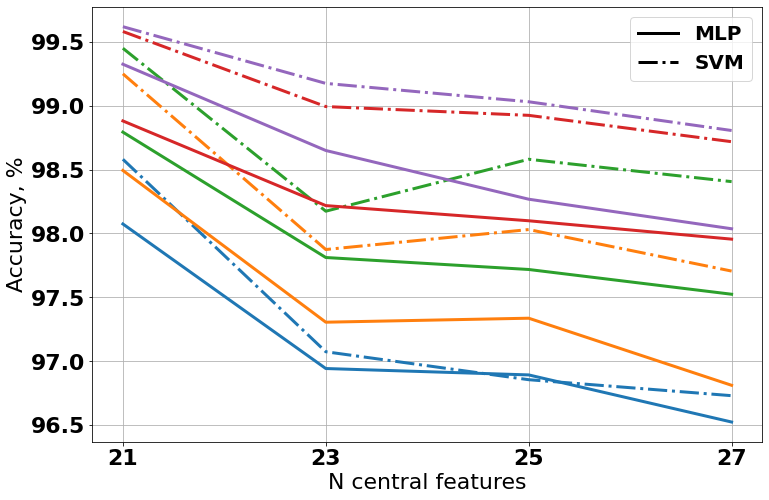

In [14]:
mlp_acc_n_16 = np.array([98.07451862965742, 96.9429857464366, 96.89297324331083, 96.52413103275819])
svm_acc_n_16 = np.array([0.985809, 0.970743, 0.968555, 0.967304])*100

mlp_acc_n_17 = np.array([98.49337334333583, 97.30557639409852, 97.33683420855213, 96.81170292573144])
svm_acc_n_17 = np.array([0.992498, 0.978745, 0.980308, 0.977057])*100

mlp_acc_n_18 = np.array([98.79344836209053, 97.81195298824706, 97.71817954488623, 97.52438109527382])
svm_acc_n_18 = np.array([0.994499, 0.981745, 0.985809, 0.984059])*100

mlp_acc_n_19 = np.array([98.88097024256064, 98.21830457614404, 98.0995248812203, 97.95573893473369])
svm_acc_n_19 = np.array([0.995811, 0.989935, 0.989247, 0.987184])*100

mlp_acc_n_20 = np.array([99.32483120780195, 98.6496624156039, 98.26831707926982, 98.03700925231308])
svm_acc_n_20 = np.array([0.996187, 0.991748, 0.990310, 0.988060])*100

###################################

from matplotlib.lines import Line2D

fs = 16
LW = 3
LS1 = '-'
LS2 = '-.'

x = [21, 23, 25, 27]
lines = [Line2D([0], [0], color='black', linewidth=3, linestyle=LS1),
         Line2D([0], [0], color='black', linewidth=3, linestyle=LS2)]
labels = ['MLP', 'SVM']

plt.plot(x, mlp_acc_n_16, LS1, color='tab:blue', linewidth=LW)
plt.plot(x, svm_acc_n_16, LS2, color='tab:blue', linewidth=LW)

plt.plot(x, mlp_acc_n_17, LS1, color='tab:orange', linewidth=LW)
plt.plot(x, svm_acc_n_17, LS2, color='tab:orange', linewidth=LW)

plt.plot(x, mlp_acc_n_18, LS1, color='tab:green', linewidth=LW)
plt.plot(x, svm_acc_n_18, LS2, color='tab:green', linewidth=LW)

plt.plot(x, mlp_acc_n_19, LS1, color='tab:red', linewidth=LW)
plt.plot(x, svm_acc_n_19, LS2, color='tab:red', linewidth=LW)

plt.plot(x, mlp_acc_n_20, LS1, color='tab:purple', linewidth=LW)
plt.plot(x, svm_acc_n_20, LS2, color='tab:purple', linewidth=LW)




plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend(lines, labels, loc=0, prop={'size': 20})
plt.grid()
plt.xticks(x)
# plt.xlim(15.7, 21)
# plt.text(20.1, 55, 'N=21', fontsize=fs)
# plt.text(20.1, 80, 'N=23', fontsize=fs)
# plt.text(20.1, 84.5, 'N=25', fontsize=fs)
# plt.text(20.1, 89, 'N=27', fontsize=fs)
pass

In [15]:
def plot_matshow(data, x_labels, y_labels, cmap_name='YlGn'):
    df = pd.DataFrame.from_dict(data, orient='index')
    fig, ax = plt.subplots()
    cax = ax.matshow(df, cmap=plt.get_cmap(cmap_name))
    fig.colorbar(cax)
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Train')
    ax.set_xlabel('Test')
    return fig, ax

### Plot MLP on diff N

In [16]:
data_mlp = {'21': [98.074519, 2.294324, 73.412103, 1.744186],
            '23': [3.194549, 96.942986, 0.168792, 87.871968],
            '25': [76.594149, 0.193798, 96.892973, 0.012503],
            '27': [2.425606, 91.785446, 0.056264, 96.524131]}

/tmp/ipykernel_137828/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_137828/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


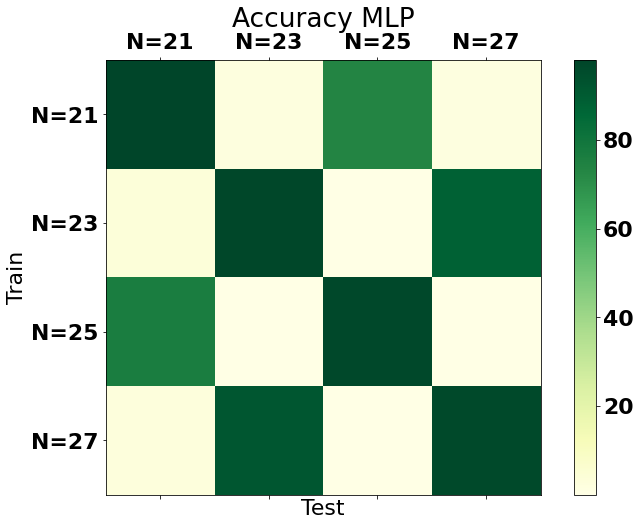

In [17]:
ticks = ['N=21', 'N=23', 'N=25', 'N=27']
fig_mlp, ax_mlp = plot_matshow(data_mlp, [' '] + ticks, [' '] + ticks)
ax_mlp.set_title('Accuracy MLP')
pass

### Plot SVM on diff N

In [18]:
data_svm = {'21': np.array([0.985809, 0.014254, 0.768067, 0.012066]) * 100,
            '23': np.array([0.024569, 0.970743, 0.000563, 0.844836]) * 100,
            '25': np.array([0.733371, 0.002938, 0.968555, 0.000125]) * 100,
            '27': np.array([0.019067, 0.821455, 0.000125, 0.967304]) * 100}

In [19]:
data_mlp

{'21': [98.074519, 2.294324, 73.412103, 1.744186],
 '23': [3.194549, 96.942986, 0.168792, 87.871968],
 '25': [76.594149, 0.193798, 96.892973, 0.012503],
 '27': [2.425606, 91.785446, 0.056264, 96.524131]}

/tmp/ipykernel_137828/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_137828/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


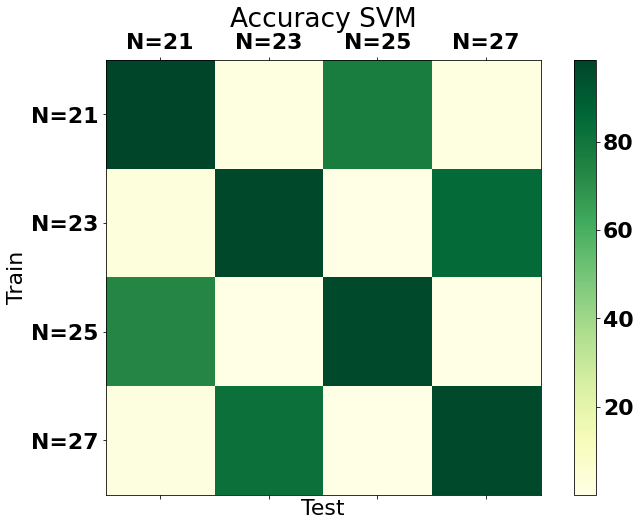

In [20]:
ticks = ['N=21', 'N=23', 'N=25', 'N=27']
fig_svm, ax_svm = plot_matshow(data_svm, [' '] + ticks, [' '] + ticks)
ax_svm.set_title('Accuracy SVM')
pass

### Plot Mlp on diff L

In [21]:
data_mlp_l = {'1.6': [50.894741, 21.544112, 21.927014, 31.405798, 30.022662],
              '6.6': [15.667735, 66.015472, 40.947097, 26.334297, 25.529421],
              '7.6': [21.372197, 39.282644, 70.461827, 33.632883, 24.349457],
              '8.6': [25.490349, 31.734000, 39.290459, 73.337501, 32.359147],
              '10.6': [36.125654, 24.404157, 27.209502, 33.679769, 81.323748]}

/tmp/ipykernel_137828/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_137828/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


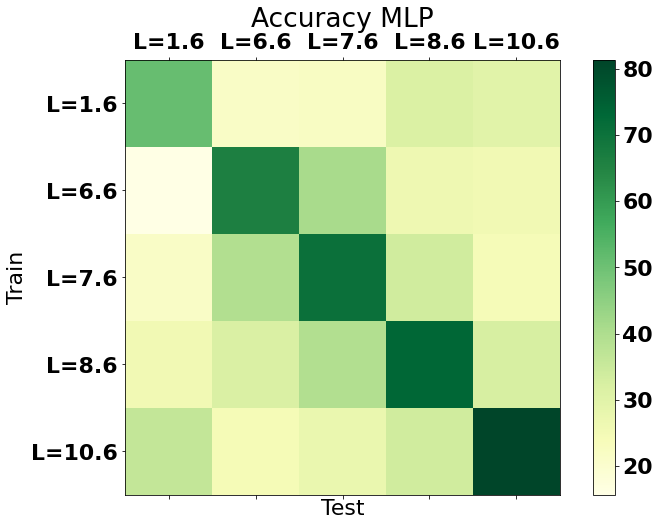

In [22]:
ticks = ['L=1.6', 'L=6.6','L=7.6','L=8.6', 'L=10.6']
fig_svm, ax_svm = plot_matshow(data_mlp_l, [' '] + ticks, [' '] + ticks)
ax_svm.set_title('Accuracy MLP')
pass

### Plot SVM on diff L

In [23]:
data_svm_l = {'1.6': np.array([0.494647, 0.194421, 0.176369, 0.219583, 0.354927]) * 100,
              '6.6': np.array([0.207080, 0.691099, 0.393452, 0.321403, 0.207002]) * 100,
              '7.6': np.array([0.237556, 0.423771, 0.723373, 0.391498, 0.236305]) * 100,
              '8.6': np.array([0.311245, 0.294366, 0.348363, 0.735094, 0.350004]) * 100,
              '10.6': np.array([0.303118, 0.222943, 0.254591, 0.291709, 0.799719]) * 100}

/tmp/ipykernel_137828/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_137828/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


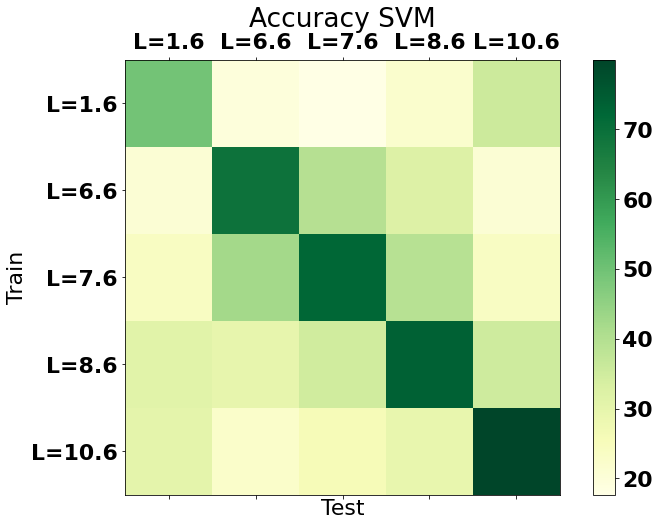

In [24]:
ticks = ['L=1.6', 'L=6.6','L=7.6','L=8.6', 'L=10.6']
fig_svm, ax_svm = plot_matshow(data_svm_l, [' '] + ticks, [' '] + ticks)
ax_svm.set_title('Accuracy SVM')
pass


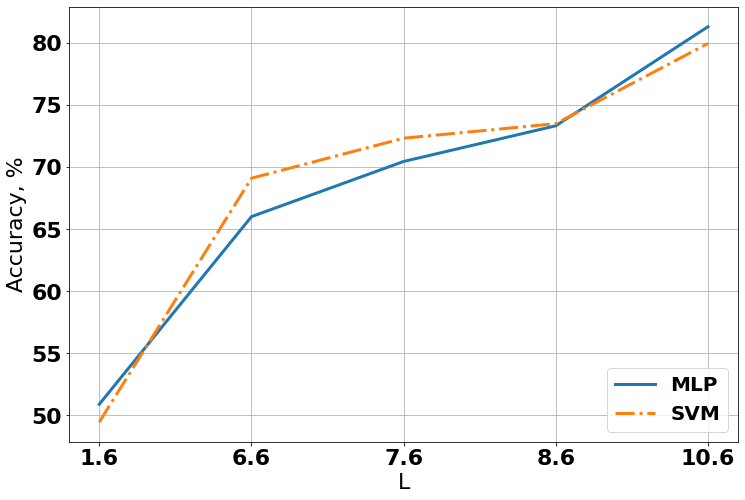

In [25]:
# 16 center features
from matplotlib.lines import Line2D

fs = 16
LW = 3
LS1 = '-'
LS2 = '-.'


x = range(5)
xx = [1.6, 6.6, 7.6, 8.6, 10.6]
L = [str(i) for i in xx]

acc_mlp_diff_l = [data_mlp_l[l][i] for i, l in enumerate(L)]
acc_svm_diff_l = [data_svm_l[l][i] for i, l in enumerate(L)]
plt.plot(x, acc_mlp_diff_l, LS1, label='MLP', linewidth=LW)
plt.plot(x, acc_svm_diff_l, LS2, label='SVM', linewidth=LW)
plt.xlabel('L')
plt.ylabel('Accuracy, %')
plt.legend(loc=4, prop={'size': 20})
plt.xticks(x, L)
plt.grid()